<a href="https://colab.research.google.com/github/youngsiiimba/Time-Series-Analysis/blob/main/TCN_monthly_milk_production_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Library

In [1]:
!pip install wget
!pip install keras-tcn
import wget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm

from tcn import TCN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
wget.download("https://github.com/philipperemy/keras-tcn/raw/master/tasks/monthly-milk-production-pounds-p.csv")

'monthly-milk-production-pounds-p (3).csv'

### Read the dataset

In [3]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col=0, parse_dates=True)

### Display top5 Record

In [4]:
print(milk.shape)
milk.head()

(168, 1)


,milk_production_pounds
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


##Data preparation

### Lookback 12 month windows

In [5]:
lookback_window = 12 

### Convert Milk Data into Numpy Array

In [6]:
milk = milk.values  

### Convert in to X, y format

In [7]:
x = []
y = []
for i in tqdm(range(lookback_window, len(milk))):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])

  0%|          | 0/156 [00:00<?, ?it/s]

### Generate Array of list x and y

In [8]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(156, 12, 1)
(156, 1)


##TCN model

### Model Design

In [9]:
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                136256    
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 136,321
Trainable params: 136,321
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile('adam','mae')

###Train

In [11]:
history = model.fit(x, y, epochs=300, validation_split=0.1)

Epoch 1/300
5/5 [==============================] - 5s 164ms/step - loss: 2056.3823 - val_loss: 265.8192
Epoch 2/300
5/5 [==============================] - 0s 12ms/step - loss: 774.0198 - val_loss: 1545.5864
Epoch 3/300
5/5 [==============================] - 0s 12ms/step - loss: 874.5132 - val_loss: 895.0286
Epoch 4/300
5/5 [==============================] - 0s 12ms/step - loss: 651.7828 - val_loss: 379.5720
Epoch 5/300
5/5 [==============================] - 0s 13ms/step - loss: 442.5644 - val_loss: 394.2055
Epoch 6/300
5/5 [==============================] - 0s 13ms/step - loss: 426.3651 - val_loss: 704.8297
Epoch 7/300
5/5 [==============================] - 0s 12ms/step - loss: 396.8609 - val_loss: 513.5321
Epoch 8/300
5/5 [==============================] - 0s 12ms/step - loss: 371.5615 - val_loss: 183.3310
Epoch 9/300
5/5 [==============================] - 0s 12ms/step - loss: 281.1783 - val_loss: 193.8175
Epoch 10/300
5/5 [==============================] - 0s 36ms/step - loss: 145.08

In [12]:
model.evaluate(x,y)

5/5 [==============================] - 0s 35ms/step - loss: 23.4626


23.46262550354004

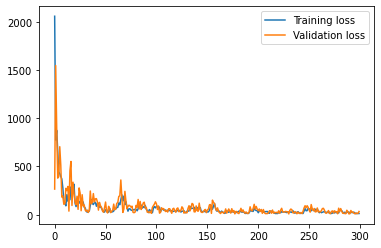

In [13]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

### Prediction with TCN Model

In [14]:
predict = model.predict(x)

##Results

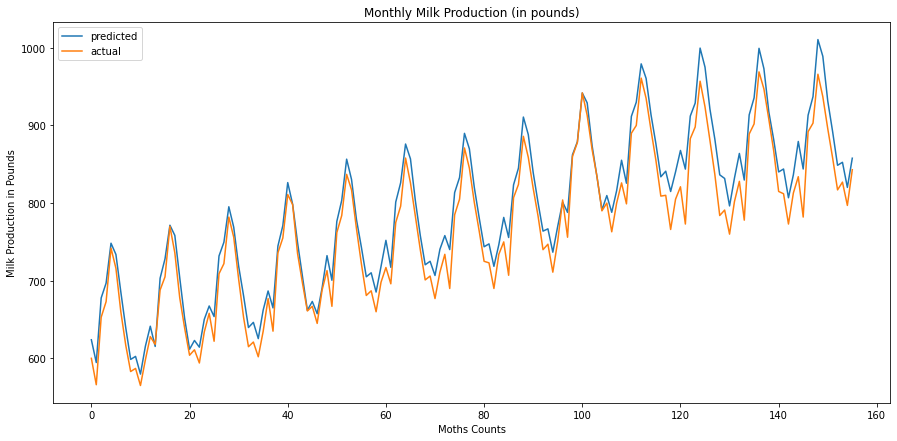

In [15]:
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.xlabel("Moths Counts")
plt.ylabel("Milk Production in Pounds")
plt.show()